# KNN

### Predict whether a person will have diabetes or not

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import train_test_split for splitting the data
from sklearn.model_selection import train_test_split

# import StandardScaler for preprocessing, so that there is no bias of large numbers
from sklearn.preprocessing import StandardScaler

# import KNeighborsClassifier for classifying the data
from sklearn.neighbors import KNeighborsClassifier

# import tools for testing the data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('diabetes.csv')
print(len(dataset))
print(dataset.head())

768
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Values of columns like 'Glucose', 'BloodPressure' cannot be accepted as zeroes because it will affect the outcome.
We can replace such values with the mean of the respective column.

In [3]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    # Replace zero with nan
    dataset[column] = dataset[column].replace(0, np.NaN)
    # Create the mean of the column. skipna=True to skip nans
    mean = int(dataset[column].mean(skipna=True))
    # Replace the nans with the mean
    dataset[column] = dataset[column].replace(np.NaN, mean)

### Split the dataset into train and test data

In [4]:
# Split dataset
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### Feature Scaling

Note: `Scale features` of any algorithm that computes distance or assumes normality.

`StandardScaler()` scales the data. Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s; where `x` is the data point, `u` is the mean of the training samples or zero, and `s` is standard deviation of the training samples.

In [5]:
# Feature scaling
sc_X = StandardScaler()

# Create scaler on the X_train variable
X_train = sc_X.fit_transform(X_train)

# Transform X_test
X_test = sc_X.transform(X_test)

### Define the Model

Define the model using `KNeighborsClassifier` and fit the train data in the model.

N_neighbors here is `K`, `p` is power parameter to define the metric used in `Euclidean` in this case.

In [6]:
# To pick K, get the square root of the y_test data points 
import math
math.sqrt(len(y_test))

# Produces an even number. Cannot use an even number so 1 is taken from it to make it an odd number.

12.409673645990857

In [7]:
# Define the model: Init K-NN
# n_neighbors is K, p is 2 because we are investigatin 2 classfications (diabetic or not diabetic)
# euclidean is the most common metric and it works quite well.
classifier = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [8]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [9]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [10]:
# Evaluate Model - it is important to evalute the model 
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[94 13]
 [15 32]]


In [11]:
# Confusion matrix outcomes
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

<AxesSubplot:>

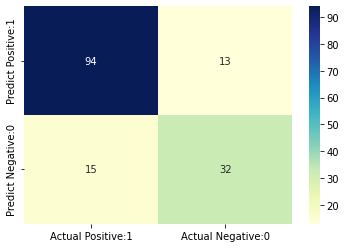

In [12]:
# Visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Metrics

Classification Report

This is a way to evaluate the classification model performance. It displays precision, recall, f1 and support scores for the model

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



#### Classification Accuracy

In [14]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8182


#### Classification Error

In [15]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1818


#### Precision

Precision is the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

In [16]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8785


#### Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

In [17]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8624


#### Specificity

In [18]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7111


#### f1-score

The F1 score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1
 score if both recall and precision are high.
 
 
#### Support

Support is the actual number of occurrences of the class in our dataset.

#### ROC Curve

The receiver operating characteristic (ROC) curve is a common tool used with binary classifiers to plot `true positive rate` against `false positive rate`. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus 1 – `specificity`.

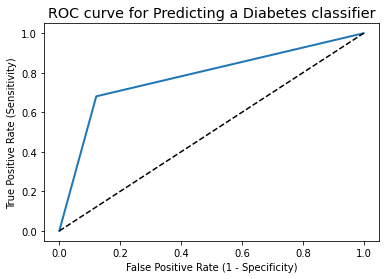

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [20]:
# compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7797


# Summary

KNearest Neighbors (KNN) was the algorithm used to train the data to predict if a person has diabetes or not. The model used a K value of 11, which was evaluated from the square root of the testing data. The value 12.409673645990857, however an odd number close to the evaluated value was picked because it is better to use an odd number as K to train KNNs.


#### Confusion Matrix

The Confusion Matrix was evaluated and the results are as follows:

True Positives (TP) = 94

True Negatives (TN) = 32

False Positives (FP) = 13

False Negatives (FN) = 15

The confusion matrix shows `94 + 32 = 126 correct predictions` and `13 + 15 incorrect predictions`.

This case shows:

`True Positives` -> 94 -> Those who were predicted to have diabetes and had diabetes.

`True Negatives` -> 32 -> Those who were predicted to not have diabetes and didn't have diabetes.

`False Positives` -> 13 (Type I error) -> Those who were predicted to have diabetes and didn't have diabetes

`False Negatives`-> 15 (Type II error) -> Those who were predicted to not have diabets and had diabetes.


#### Classification Metrics

The Classification Accuracy value of 0.8182 was evaluated with `K = 11` and `euclidean` metrics. With this accuracy value, we can conclude that out of 10 diagnosis, there is possibility of getting 2 incorrect diagnosis and 8 correct diagnosis results of diabetes.

The Precision value of 0.8785 means that diagnosis of 1 of every 10 patients does not have diabetes, and 9 have diabetes.

The Recall value of 0.8624 means that diagnosis of 1 of every 10 patients, is missed by the model and 9 are correctly diagnosed with diabetes.

The Specificity value of 0.7111 means that 3 of every 10 patients are diagnosed incorrectly with diabetes and 7 are correctly diagnosed with diabetes.